# Oasis_task_5

Name  :Pooja Singh

Domain : Data Science

Project : SALES PREDICTION USING PYTHON

### Importing Libraries

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Reading datasets

In [131]:
sales_data=pd.read_csv('Advertising.csv')

In [132]:
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [133]:
sales_data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


### Analysing Data

In [134]:
sales_data.shape

(200, 5)

In [136]:
sales_data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [138]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [139]:
sales_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


##### Finding null values

In [140]:
sales_data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

###### No null values found.

##### Finding duplicate values

In [141]:
sales_data.duplicated().sum()

0

###### No duplicates found.

##### Droping columns that are not needed

In [142]:
sales_data.drop('Unnamed: 0',axis=1,inplace=True)

In [143]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##### Analysing highest sales

In [144]:
sales_data.nlargest(1,'Sales')

,TV,Radio,Newspaper,Sales
175,276.9,48.9,41.8,27.0


##### Analysing lowest sales

In [145]:
sales_data.nsmallest(1,'Sales')

,TV,Radio,Newspaper,Sales
130,0.7,39.6,8.7,1.6


#### Finding correlation

In [146]:
sales_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Analysing by plots

#### Analysing correlations

<Axes: >

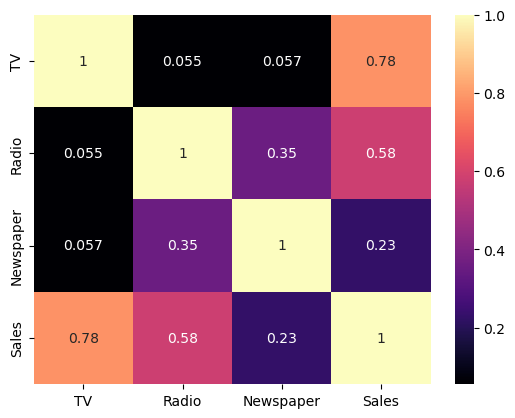

In [147]:
corr=sales_data.corr()
sns.heatmap(data=corr,cmap='magma',annot=True)

##### Analysing highest  and lowest sales

In [148]:
px.bar(data_frame=sales_data,x='Sales',color='Sales')

##### Analysing relation between attributes

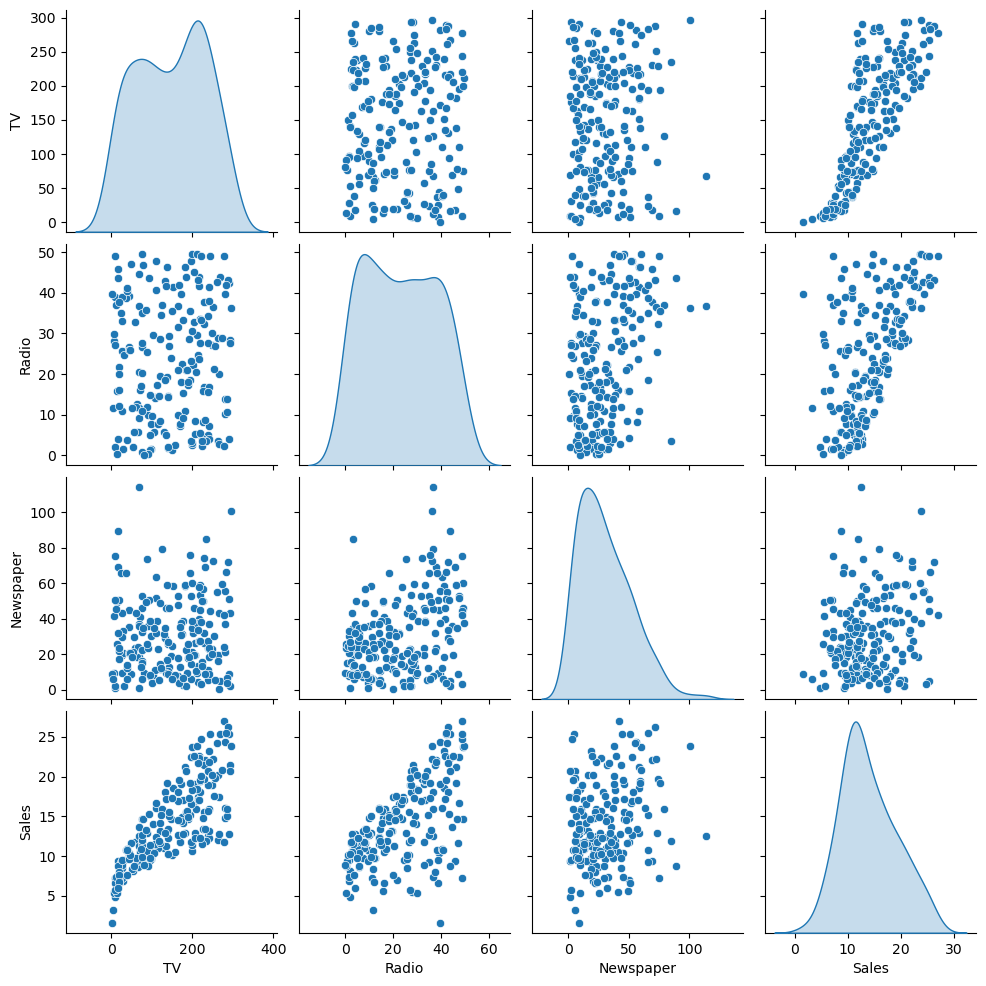

In [149]:
sns.pairplot(data=sales_data,diag_kind='kde')

##### Analysing distribution of  Sales

<Axes: xlabel='Sales', ylabel='Count'>

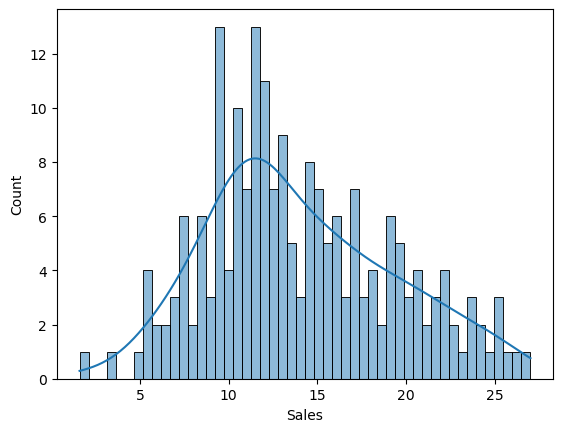

In [150]:
sns.histplot(data=sales_data,x='Sales',bins=50,kde=True)

## Training model

#### Importing Libraries

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#### Identifying input and output

In [153]:
x=sales_data[['TV','Radio','Newspaper']]
y=sales_data['Sales']

In [154]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [155]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

#### Spliting training and testing data

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [158]:
x_train

,TV,Radio,Newspaper
2,17.2,45.9,69.3
77,120.5,28.5,14.2
46,89.7,9.9,35.7
187,191.1,28.7,18.2
191,75.5,10.8,6.0
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [159]:
y_train

2       9.3
77     14.2
46     10.6
187    17.3
191     9.9
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 120, dtype: float64

#### Fitting data in model

In [160]:
model=LinearRegression()

In [162]:
model.fit(x_train,y_train)

LinearRegression()

In [164]:
predict=model.predict(x_test)

In [166]:
print(predict)

[16.63902413 21.27548678 21.72174077 10.8164995  22.22714832 13.35087848
 21.26296358  7.28718173 13.35732452 15.18037868  8.89761565  6.49138646
 14.51326935  8.83867006  9.49159091 12.07490644  8.84018706 16.20182611
 10.27027547 18.79536766 19.93298024 13.8642087  12.38785643 21.71127111
  7.53457962  5.56500602 20.99254849 11.80311964  9.06161794  8.37526001
 12.25279138  9.91469854 21.830671   12.77700019 18.26337691 20.13197086
 14.15091605 21.11947555 10.80927512  4.31197375  9.51753508 12.4319186
 10.11635773  8.0371654  13.2521022   5.15028895  9.27682376 14.10374127
  8.70521481 11.60297218 15.67617324 11.6638007  13.31758548 11.08435278
  6.29895342  9.7925166   9.3626635  24.42448277  7.59664858 12.20187455
 17.5088018  15.24169083 11.4355623  11.17957067 16.52433204  6.81935356
 21.28044036  6.02341036  9.66588589 11.55078487  9.02737167  6.26302446
 14.85416637 17.49017722 16.22677507 16.17507516 14.92216334 19.61246915
 13.84944178 21.17629165]


#### Checking performance of model

In [167]:
r2_score(predict,y_test)

0.8596530802003977

In [168]:
mean_squared_error(predict,y_test)

3.4290064802196296

## Making Predictions

In [169]:
i_1=float(input("Ener the advertising score of TV : "))
i_2=float(input("Enter the advertising score of Radio : "))
i_3=float(input("Enter the advertising score of Newspaper : "))
i_data=[[i_1,i_2,i_3]]
result=model.predict(i_data)
print("Calculated sales is : ",result[0])

Ener the advertising score of TV : 34.5
Enter the advertising score of Radio : 67.8
Enter the advertising score of Newspaper : 98.8
Calculated sales is :  18.430054398229725
